## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt 

##File Read

In [ ]:
filename = '557f'
input_filename = filename + '.txt'
output_filename = filename + '.csv'

data_txt = pd.read_csv(input_filename, sep="\t")
data_txt.head()

,# time counts unit events
0,0.275183415 91204949 cycle...
1,0.275183415 5092084 instr...
2,0.275183415 31227 branc...
3,0.275183415 47934 L1-dc...
4,0.275183415 43846 L1-ic...


##Data Preprocessing

In [ ]:
dataset_columns = set()
timewise_data = {}

ignored_time = []   # add time whose data you want to skip

for index, row in data_txt.iterrows():

  if row[0].find('time') != -1:
    continue

  ignore = 0
  for time in ignored_time:
    if time in row[0]:
      ignore = 1
      break

  if ignore:
    continue

  current_time_data = []
  extract = ""

  for i in range(len(row[0])):
    if row[0][i] not in [' ', ',']:
      extract += row[0][i]
    if row[0][i] == ' ' and extract != "":
      current_time_data.append(extract)
      extract = ""

  current_time_data[2] = current_time_data[2].split(':')[0]
  dataset_columns.add(current_time_data[2])
  if not timewise_data.get(current_time_data[0]):
    timewise_data[current_time_data[0]] = []
  timewise_data[current_time_data[0]].append([current_time_data[2], current_time_data[1]])




##Dataset Creation

In [ ]:


dataset = {}
dataset['time'] = []

for column in dataset_columns:
  dataset[column] = []

cpi_possible = 0
if "instructions" in dataset_columns and "cycles" in dataset_columns:
  dataset['cpi'] = []
  cpi_possible = 1
else:
  print("cpi does not exist")

token = {}    # token for only one time addition of event for a  particular time

for column in dataset_columns:
  token[column] = 1

for key, val in timewise_data.items():

  for column in dataset_columns:
    token[column] = 1

  dataset['time'].append(key)
  instruction = 0
  cycle = 0

  for event in val:

    if event[0] == "instructions":
      instruction = event[1]
    if event[0] == "cycles":
      cycle = event[1]

  for event in val:
      
    if token[event[0]]:
        
      event_count_per_instruction = float(event[1])/float(instruction)
      dataset[event[0]].append(event_count_per_instruction)

    token[event[0]] = 0

  if cpi_possible:

    cpi = float(cycle)/float(instruction)
    dataset["cpi"].append(cpi)

dataset = pd.DataFrame.from_dict(dataset)

# removing outliers
dataset = dataset[~(dataset['cpi'] > 2)]

dataset.to_csv(output_filename)

dataset.head()

,time,L2-load-misses,dTLB-store-misses,L2-store-misses,branch-misses,branch-load-misses,L1-dcache-load-misses,instructions,dTLB-load-misses,cycles,iTLB-load-misses,L1-icache-load-misses,cpi
1,0.550651090,0.000479,0.000638,1.849743e-04,7.498027e-03,6.504762e-03,0.007104,1.0,0.000083,0.637202,1.616387e-07,1.454192e-04,0.637202
2,0.826023049,0.000376,0.001859,5.654295e-08,1.499046e-07,2.524708e-07,0.005618,1.0,0.000087,0.456473,2.366914e-08,1.004624e-06,0.456473
3,1.101383655,0.000007,0.000000,0.000000e+00,1.280428e-07,1.238826e-07,0.000416,1.0,0.000006,0.253215,0.000000e+00,6.998441e-07,0.253215
4,1.376739679,0.000007,0.000000,2.311567e-09,1.400810e-07,1.789153e-07,0.000415,1.0,0.000006,0.253218,0.000000e+00,9.449687e-07,0.253218
5,1.652098434,0.000007,0.000000,0.000000e+00,1.220990e-07,1.327364e-07,0.000416,1.0,0.000006,0.253326,4.624962e-09,8.870678e-07,0.253326


##Data Visualization

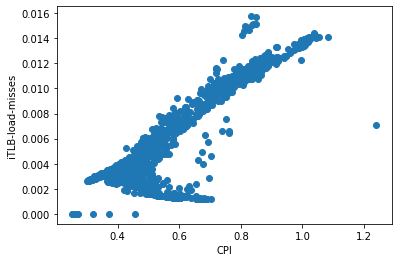

In [ ]:

plt.scatter(dataset['cpi'], dataset['branch-misses'])
plt.xlabel('CPI')
plt.ylabel('branch-misses')
plt.show()
